In [1]:
#读入，预处理
import pandas as pd
import numpy as np
df_fission = pd.read_csv('/Users/blytheluo/Documents/GitHub/geektime/裂变关18/易速鲜花增长模型.csv')
df_fission.head()

,用户码,曾助力,曾拼团,曾推荐,设备,城市类型,R值,M值,裂变类型,是否转化
0,1,0,1,0,电脑,中小,10,138.00,情侣花享,0
1,2,0,1,0,电脑,一线,4,105.59,拼团盛放,0
2,3,0,1,0,电脑,一线,1,494.13,拼团盛放,1
3,4,0,1,1,手机,二线,10,148.45,没有促销,0
4,5,1,0,0,手机,二线,2,337.18,拼团盛放,0


/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


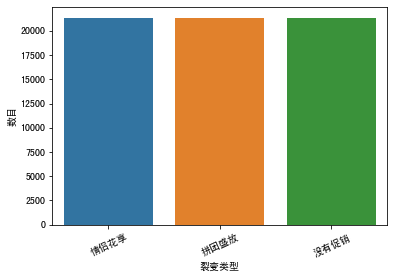

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

fig = sns.countplot('裂变类型', data=df_fission)
fig.set_xticklabels(fig.get_xticklabels(), rotation=25)
fig.set_ylabel('数目')
plt.show()

<BarContainer object of 3 artists>

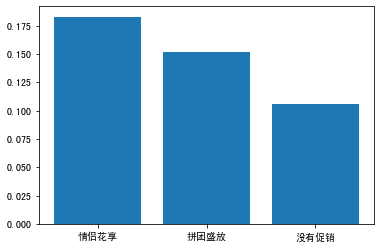

In [10]:
df_plot = df_fission.groupby('裂变类型').是否转化.mean().reset_index()
plt.bar(df_plot['裂变类型'], df_plot['是否转化'])

In [11]:
#特征工程
df_dummies = df_fission.drop(['裂变类型'],axis=1)
df_dummies = pd.get_dummies(df_dummies)
df_dummies['裂变类型'] = df_fission['裂变类型']
df_fission = df_dummies.copy()
df_fission.head()

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,0,0,1,0,1,0,情侣花享
1,2,0,1,0,4,105.59,0,0,0,1,1,0,0,拼团盛放
2,3,0,1,0,1,494.13,1,0,0,1,1,0,0,拼团盛放
3,4,0,1,1,10,148.45,0,0,1,0,0,0,1,没有促销
4,5,1,0,0,2,337.18,0,0,1,0,0,0,1,拼团盛放


In [22]:
df_discount = df_fission.query("裂变类型 =='情侣花享'| 裂变类型 =='没有促销'")

In [24]:
#构建增长标签
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 1), '标签'] = 0
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 0), '标签'] = 1
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 1), '标签'] = 2
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 0), '标签'] = 3
df_discount.head()

/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型,标签
0,1,0,1,0,10,138.00,0,0,0,1,0,1,0,情侣花享,1.0
3,4,0,1,1,10,148.45,0,0,1,0,0,0,1,没有促销,3.0
5,6,0,1,1,10,56.48,0,0,0,1,0,0,1,情侣花享,1.0
6,7,1,1,1,2,551.98,0,1,0,0,1,0,0,情侣花享,1.0
8,9,1,0,1,7,29.99,1,0,0,1,0,0,1,情侣花享,0.0


In [25]:
X = df_discount.drop(['标签', '是否转化'], axis=1)
y = df_discount.标签

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [28]:
#选择算法训练模型
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train.drop(['用户码','裂变类型'],axis=1), y_train)

/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:15:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
uplift_probs = xgb_model.predict_proba(X_test.drop(['用户码','裂变类型'],axis=1))
uplift_probs

array([[0.05779624, 0.42779416, 0.04329965, 0.47111   ],
       [0.05857937, 0.42858303, 0.05535498, 0.45748267],
       [0.06708433, 0.4965799 , 0.06728459, 0.36905122],
       ...,
       [0.06496314, 0.44792292, 0.0228678 , 0.46424612],
       [0.0789047 , 0.4244552 , 0.05198535, 0.44465476],
       [0.04501517, 0.48013481, 0.02245697, 0.45239305]], dtype=float32)

In [30]:
#计算裂变增量
discount_uplift = X_test.copy()
discount_uplift['P_TR'] = uplift_probs[:,0]
discount_uplift['P_TN'] = uplift_probs[:,1]
discount_uplift['P_CR'] = uplift_probs[:,2]
discount_uplift['P_CN'] = uplift_probs[:,3]

In [31]:
discount_uplift['增量分数'] = discount_uplift.eval('P_TR + P_CN - (P_TN + P_CR)')
discount_uplift

,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型,P_TR,P_TN,P_CR,P_CN,增量分数
15868,15869,0,1,1,1,333.39,0,1,0,1,0,0,情侣花享,0.057796,0.427794,0.043300,0.471110,0.057812
33225,33226,1,0,0,7,29.99,0,1,0,0,0,1,情侣花享,0.058579,0.428583,0.055355,0.457483,0.032124
30309,30310,0,1,1,3,93.94,0,0,1,0,0,1,情侣花享,0.067084,0.496580,0.067285,0.369051,-0.127729
43369,43370,0,1,1,5,29.99,0,1,0,0,0,1,情侣花享,0.047551,0.449388,0.022954,0.480107,0.055316
52540,52541,1,0,0,3,242.33,1,0,0,0,0,1,情侣花享,0.113181,0.412035,0.043588,0.431196,0.088755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51156,51157,0,1,0,3,136.39,0,1,0,1,0,0,情侣花享,0.089818,0.480142,0.043055,0.386985,-0.046395
31954,31955,0,1,0,8,207.98,0,0,1,0,0,1,情侣花享,0.058342,0.375758,0.053327,0.512573,0.141831
29883,29884,0,1,1,5,97.32,0,0,1,0,0,1,没有促销,0.064963,0.447923,0.022868,0.464246,0.058419
62541,62542,0,1,0,7,159.18,0,0,1,0,1,0,情侣花享,0.078905,0.424455,0.051985,0.444655,0.047119


In [34]:
#看看拼团盛放方法的情况，然后比较两个增量

df_discount = df_fission.query("裂变类型 =='拼团盛放'| 裂变类型 =='没有促销'")

#构建增长标签
df_discount.loc[(df_discount.裂变类型 == '拼团盛放') & (df_discount.是否转化 == 1), '标签'] = 0
df_discount.loc[(df_discount.裂变类型 == '拼团盛放') & (df_discount.是否转化 == 0), '标签'] = 1
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 1), '标签'] = 2
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 0), '标签'] = 3
df_discount.head()

X = df_discount.drop(['标签', '是否转化'], axis=1)
y = df_discount.标签


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

#选择算法训练模型
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train.drop(['用户码','裂变类型'],axis=1), y_train)

uplift_probs = xgb_model.predict_proba(X_test.drop(['用户码','裂变类型'],axis=1))
uplift_probs

#计算裂变增量
discount_uplift = X_test.copy()
discount_uplift['P_TR'] = uplift_probs[:,0]
discount_uplift['P_TN'] = uplift_probs[:,1]
discount_uplift['P_CR'] = uplift_probs[:,2]
discount_uplift['P_CN'] = uplift_probs[:,3]

discount_uplift['增量分数'] = discount_uplift.eval('P_TR + P_CN - (P_TN + P_CR)')
discount_uplift

/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/blytheluo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

[17:41:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型,P_TR,P_TN,P_CR,P_CN,增量分数
56332,56333,1,0,1,9,682.85,0,0,1,0,1,0,拼团盛放,0.074093,0.400827,0.058623,0.466457,0.081100
25861,25862,1,1,1,1,230.13,0,0,1,0,0,1,拼团盛放,0.200702,0.367437,0.058087,0.373774,0.148952
22098,22099,1,0,1,3,531.18,0,1,0,0,0,1,没有促销,0.065720,0.520712,0.022825,0.390743,-0.087073
14118,14119,0,1,1,3,29.99,0,1,0,0,0,1,拼团盛放,0.066443,0.447728,0.031836,0.453993,0.040872
33927,33928,1,1,1,4,637.71,0,1,0,1,0,0,没有促销,0.069409,0.337266,0.075581,0.517743,0.174305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17865,17866,1,0,1,5,557.27,0,1,0,0,0,1,没有促销,0.032495,0.359604,0.026972,0.580928,0.226847
2253,2254,0,1,0,4,43.13,0,1,0,0,1,0,没有促销,0.141521,0.311931,0.086259,0.460290,0.203621
40169,40170,1,0,0,8,58.08,0,1,0,0,0,1,拼团盛放,0.047364,0.458603,0.023862,0.470171,0.035070
60614,60615,0,1,1,5,29.99,0,0,1,1,0,0,拼团盛放,0.069710,0.419271,0.028241,0.482778,0.104977
